# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10



**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 30 баллов
* Задача 6 &mdash; 35 баллов

-----

In [1]:
# Bot check

# HW_ID: phds_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm



### <b><font color="blue">Легкая часть</font></b>
### Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за легкую часть задания 3 и 6 весной 2024.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1CTOvQrxRpGEJG5vOIVYSPBfUzON5MAsnZeAUj3xxzFA/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [3]:
df = pd.read_csv("performance.csv")
df.head()

,Unnamed: 0,ДЗ 1,Unnamed: 2,ДЗ 3,Unnamed: 4,ДЗ 4,Unnamed: 6,ДЗ 5,Unnamed: 8,ДЗ 6,Unnamed: 10
0,NaN,Сумма Л,Сумма С,Сумма Л,Сумма С,Сумма Л,Сумма С,Сумма Л,Сумма С,Сумма Л,Сумма С
1,NaN,100,70,70,60,100,50,120,60,70,85
2,Акулинин Михаил,0,NaN,0,0,0,0,0,0,0,0
3,Алеева Арина,0,NaN,0,0,0,0,0,0,0,0
4,Александрова Анастасия,50,NaN,35,0,0,0,0,0,0,0


In [4]:
df.isna().sum()

Unnamed: 0       2
ДЗ 1             0
Unnamed: 2     171
ДЗ 3             0
Unnamed: 4       0
ДЗ 4             0
Unnamed: 6       0
ДЗ 5             0
Unnamed: 8       0
ДЗ 6             0
Unnamed: 10      0
dtype: int64

In [5]:
hw_3 = df['ДЗ 3'][1::].astype(float)
hw_6 = df['ДЗ 6'][1::].astype(float)

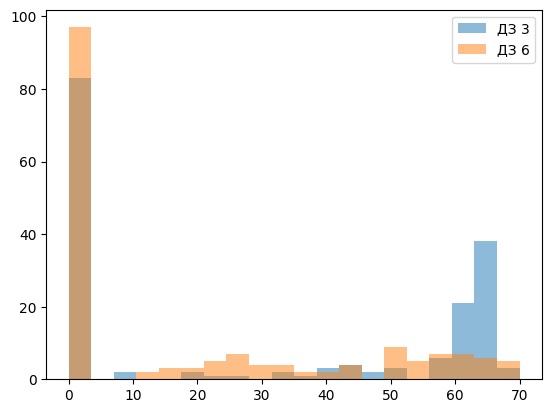

In [6]:
plt.hist(hw_3, alpha=0.5, label='ДЗ 3', bins=20)
plt.hist(hw_6, alpha=0.5, label='ДЗ 6', bins=20)
plt.legend()
plt.show()

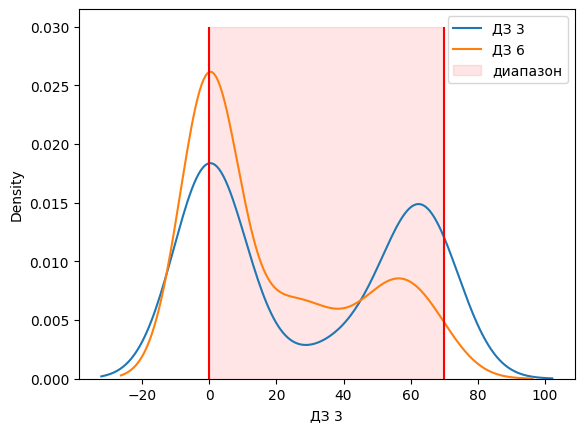

In [7]:
sns.kdeplot(hw_3, label='ДЗ 3')
sns.kdeplot(hw_6, label='ДЗ 6')
plt.vlines(70, 0, 0.03, colors="red")
plt.vlines(0, 0, 0.03, colors="red")
plt.fill_betweenx([0, 0.03], 0, 70, color="red", alpha=0.1, label="диапазон")
plt.legend()
plt.show()

In [8]:
mean_hw_3 = np.mean(hw_3.to_numpy())
mean_hw_6 = np.mean(hw_6.to_numpy())

print(
    "Среднее за 3 дз: ", mean_hw_3, "\n",
    "Среднее за 6 дз: ", mean_hw_6, "\n"
)

Среднее за 3 дз:  29.343023255813954 
 Среднее за 6 дз:  19.078488372093023 



In [9]:
sps.ttest_ind(hw_3, hw_6, equal_var=False)

TtestResult(statistic=3.467574875475076, pvalue=0.0005949360366800915, df=329.10649393834586)

Сделайте общий вывод по задаче.

**Вывод:** Глядя на гистограмму и ядерную оценку плотности можем предположить, что средние, действительно, отличаются. У нас получилось pvalue = 0.000595 < 0.05, следовательно отклоняем нулевую гипотезу. Средние баллы отличаются между группами

### Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

In [10]:
df = pd.ExcelFile('группы.xlsx')
group1 = pd.read_excel(df, '6')
group2 = pd.read_excel(df, '7')

group1_scores = group1['Unnamed: 23'][3:].dropna().astype(float)
group2_scores = group2['Unnamed: 23'][3:].dropna().astype(float)

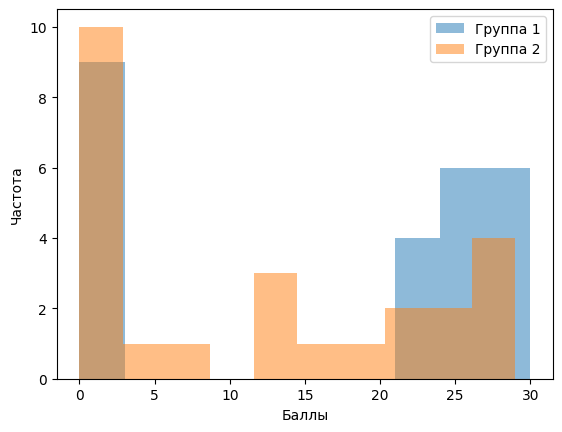

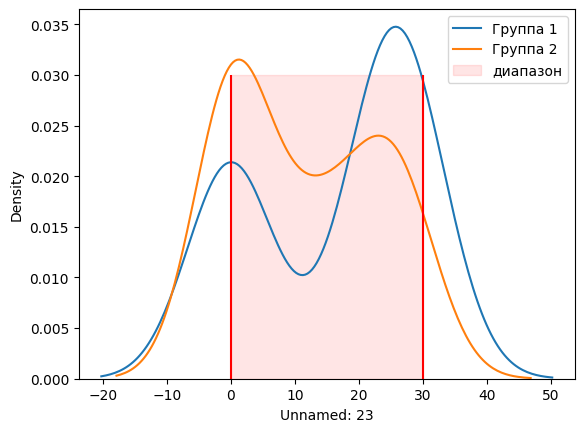

T-statistic: 1.4375153568672923
pvalue: 0.15705910879356175
Не можем отклонить нулевую гипотезу. Нет достаточных оснований считать, что средние баллы отличаются.


In [11]:

plt.hist(group1_scores, alpha=0.5, label='Группа 1')
plt.hist(group2_scores, alpha=0.5, label='Группа 2')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.legend()
plt.show()

sns.kdeplot(group1_scores, label='Группа 1')
sns.kdeplot(group2_scores, label='Группа 2')
plt.vlines(30, 0, 0.03, colors="red")
plt.vlines(0, 0, 0.03, colors="red")
plt.fill_betweenx([0, 0.03], 0, 30, color="red", alpha=0.1, label="диапазон")
plt.legend()
plt.show()

t_statistic, p_value = sps.ttest_ind(group1_scores, group2_scores)

print("T-statistic:", t_statistic)
print("pvalue:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу. Средние баллы отличаются между группами.")
else:
    print("Не можем отклонить нулевую гипотезу. Нет достаточных оснований считать, что средние баллы отличаются.")

**Вывод:**
pvalue = 0.15705910879356175 >= 0.05

Не можем отклонить нулевую гипотезу. Нет достаточных оснований считать, что средние баллы отличаются.

### Задача 3


Предположим, что вы разработали лекарство от коронавируса. Перед применением оно обязательно должно пройти клинические испытания. Для начала было разрешено проверить лекарство на двух независимых группах по 10 человек. Одна группа принимает плацебо, другая &mdash; ваш препарат. Большее количество пациентов на первом этапе брать не разрешают &mdash; слишком велики риски отрицательного результата.

Для каждого пациента измерялось количество дней от приема препарата до выздоровления. Получились следуюшие результаты:

In [12]:
x = [6, 16, 8, 13, 9, 4, 7, 10, 3, 14]  # плацебо
y = [5, 10, 3, 1, 5, 3, 19, 2, 2, 5]  # лекарство

Что вы можете сказать на основе этих результатов?
* Лекарство эффективнее, подтверждается статистическими методами;
* Наверное, лекарство эффективнее, но статистическими методами это пока не подтверждено, нужно продолжить эксперимент. Подумайте, как обосновать необходимость продолжение эксперимента;
* По результатам эксперимента нельзя сделать какой-либо вывод. Стоит ли продолжать эксперименты? Если да, то четко это обоснуйте;
* Лекарство неэффективно, нужно немедленно прекращать эксперимент.

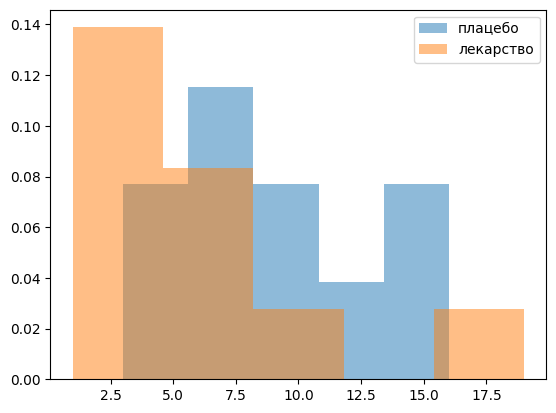

In [13]:
plt.hist(x, alpha=0.5, density=True, label='плацебо', bins=5)
plt.hist(y, alpha=0.5, density=True, label='лекарство', bins=5)
plt.legend()
plt.show()

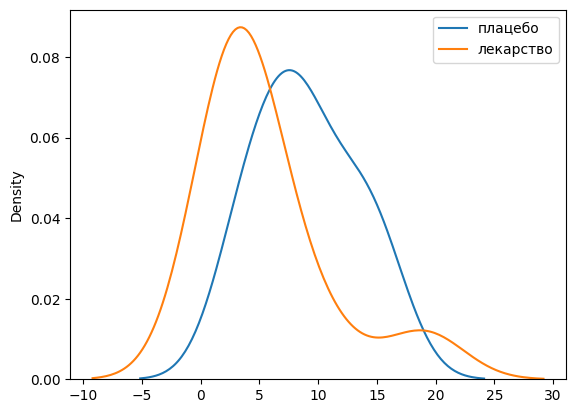

In [14]:
sns.kdeplot(x, label='плацебо')
sns.kdeplot(y, label = 'лекарство')
plt.legend()
plt.show()

In [15]:
sps.ttest_ind(x,y,equal_var=False)

TtestResult(statistic=1.6077916961893066, pvalue=0.12612583305411362, df=17.15766706404831)

Поскольку pvalue >= 0.05, мы считаем, что различие плацебо от лекарства не статистически значимо. Но мы знаем, что у каждого человека разный иммунитет или может быть просто непереносимость лекарства и т.д.. Среди тех, кто принимал лекарство был тот, кому потребовалось 19 дней. Предположим, что такие люди встречаются редко

In [16]:
y_new = [5, 10, 3, 1, 5, 3, 2, 2, 5]  # лекарство без "19"

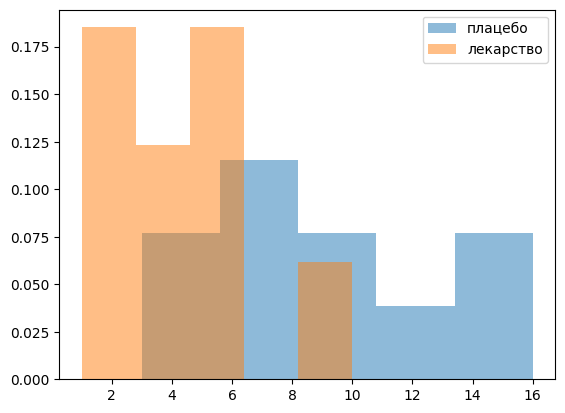

In [17]:
plt.hist(x, alpha=0.5, density=True, label='плацебо', bins=5)
plt.hist(y_new, alpha=0.5, density=True, label='лекарство', bins=5)
plt.legend()
plt.show()

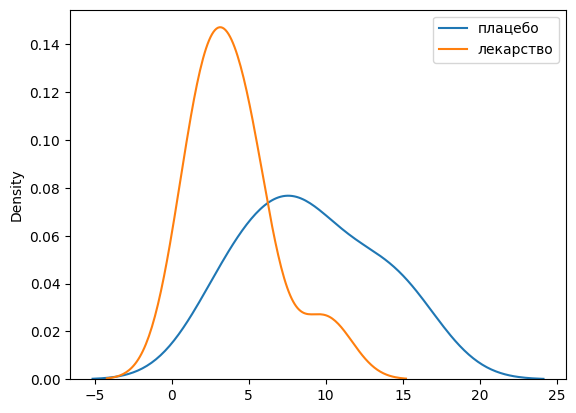

In [18]:
sns.kdeplot(x, label='плацебо')
sns.kdeplot(y_new, label = 'лекарство')
plt.legend()
plt.show()

In [19]:
sps.ttest_ind(x,y_new,equal_var=False)

TtestResult(statistic=3.0714755841697556, pvalue=0.007614595136402428, df=15.295824436026695)

Теперь мы получили pvalue < 0.05, следовательно действие плацебо уже имеет меньший вес, то есть нет оснований браковать данное лекарство

### Задача 4

Пусть $X=(X_1, \dots, X_n)$, $Y=(Y_1, \dots, Y_m)$ - независимые выборки из нормального распределения.

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

C помощью t-test проверяется пара гипотез

$$\mathsf{H}_0\colon EX_1 = 0 \text{ vs } \mathsf{H}_1\colon EX_1 < 0$$

$$\mathsf{H}_0\colon EY_1 = 0 \text{ vs } \mathsf{H}_1\colon EY_1 > 0$$

Оцените реальный уровень значимости процедуры, если обе гипотезы проверяются на уровне $\alpha=0.05$. Совпадает ли он с $\alpha$? Предложите способ сделать так, чтобы он был равен $\alpha$.

ОТВЕТ:


При проверке каждой гипотезы на уровне $\alpha$, вероятность совершения ошибки первого рода равна $\alpha$. Но, при множественном тестировании, вероятность совершить хотя бы одну ошибку первого рода для любой из гипотез увеличивается.

Оценка реального уровня значимости:

Вероятность не совершить ошибку первого рода ни в одном из тестов:

Вероятность не отвергнуть верную $\mathsf{H}_0$ в первом тесте: $1-\alpha$

Вероятность не отвергнуть верную $\mathsf{H}_0$ во втором тесте: $1-\alpha$

Поскольку тесты независимы, вероятность совершить хотя бы одну ошибку первого рода: $1 - (1-\alpha)^2$

Реальный уровень значимости: $1 - (1-\alpha)^2 = 1 - (1-0.05)^2 = 0.0975$

Реальный уровень значимости процедуры множественного тестирования (= 0.0975) превышает заявленный уровень значимости для одного теста (= 0.05). Это означает, что вероятность совершить хотя бы одну ошибку первого рода выше, чем ожидалось при рассмотрении только одного теста.

Способ сделать уровень значимости $\alpha$:
Поправка Бонферрони: Делим желаемый уровень значимости $\alpha$ на количество тестов ($m$). В данном случае, новый уровень значимости для каждого теста будет $\alpha' = \alpha / m = 0.05 / 2 = 0.025$. Этот метод говорит, что реальный уровень значимости не превысит $\alpha$.

### <b><font color="orange">Сложная часть</font></b>

### Задача 5


#### Профиль биология


Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [20]:
# path = "Data_Cortex_Nuclear.csv"
# data = pd.read_csv(path)
# data.head()

Выведем описательные статистики по вещественным параметрам.

In [21]:
# data.describe()

Количество записей по генотипам:

In [22]:
# data.Genotype.value_counts()

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

In [23]:
# <...>

Визуализируйте двумерные проекции данных и гистограммы с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета, подробнее можно почитать в [документации](https://seaborn.pydata.org/generated/seaborn.PairGrid.html). 

In [24]:
# <...>
# 

##### 1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента.  В реальных исследованиях нужно использовать конкретную альтернативу. 

Сделайте выводы.

In [25]:
# <...>

**Вывод**

Посчитайте реализацию доверительного интервала величины сдвига. 


In [26]:
# <...>

##### 2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы. 

In [27]:
# <...>

**Вывод:** <...>

Как связаны доверительные интервалы с проверкой гипотез? Подтверждается ли это в данном примере?

**Ответ:**<...>

#### Профиль физика

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [28]:
path = 'pid-5M.csv'
data = pd.read_csv(path)
data['id'].unique()

array([ 211, 2212,  321,  -11])

Постройте гистограммы признаков для каждого вида частиц.

In [29]:
data.head()


,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


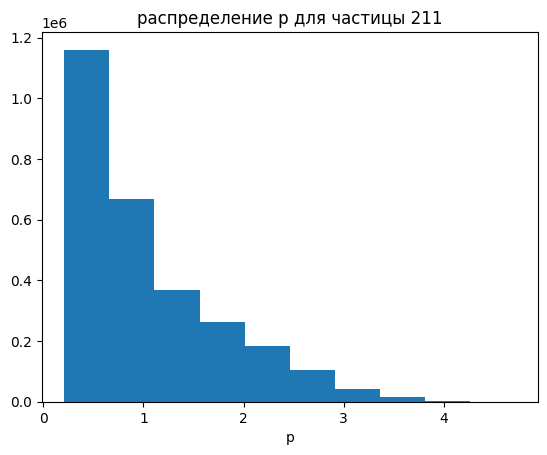

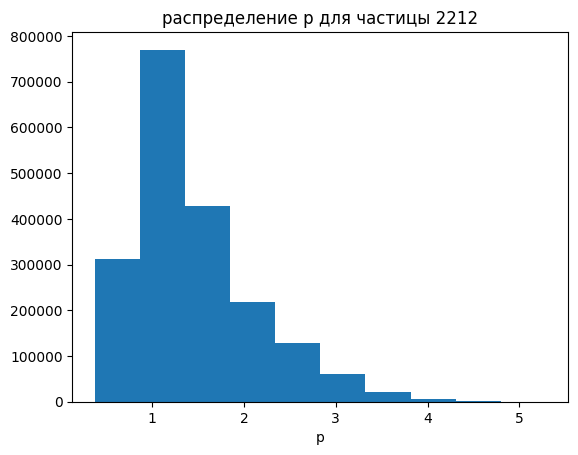

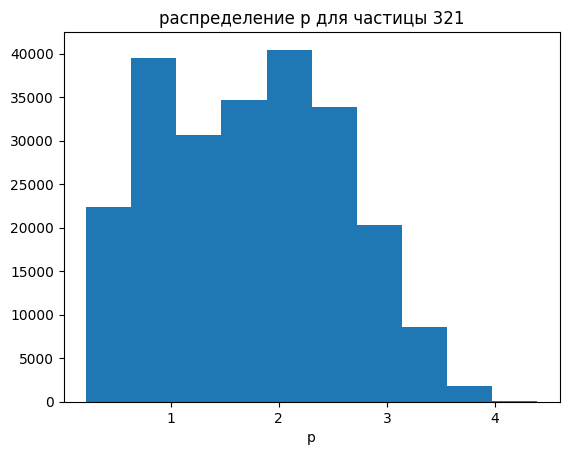

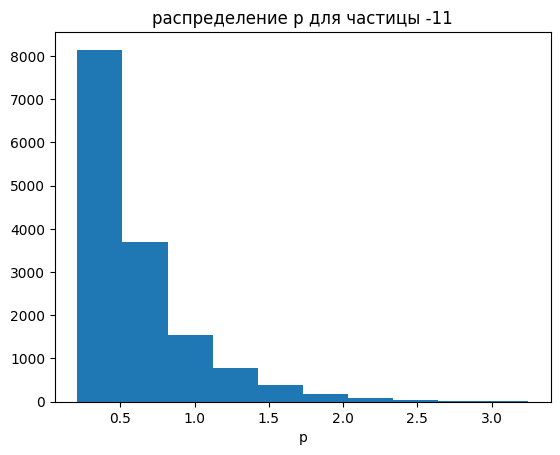

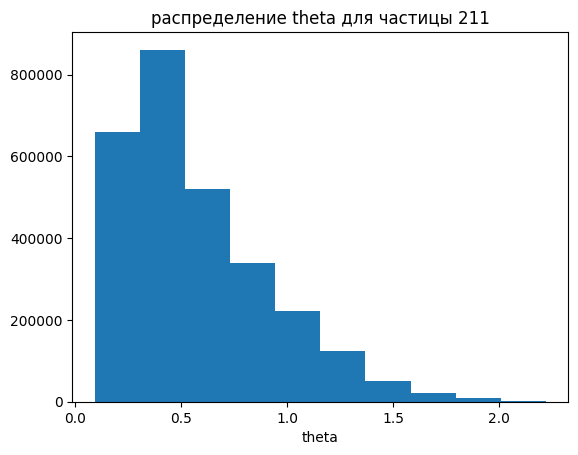

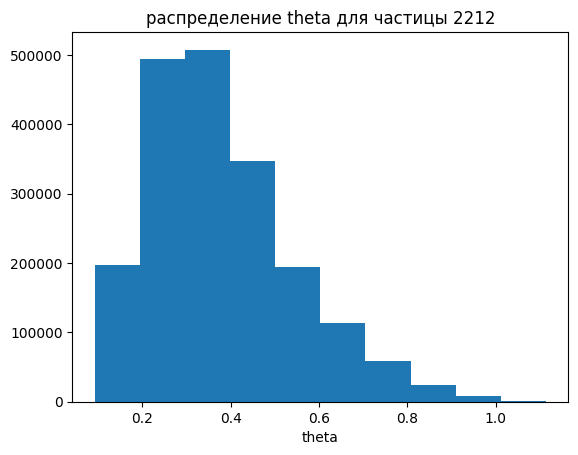

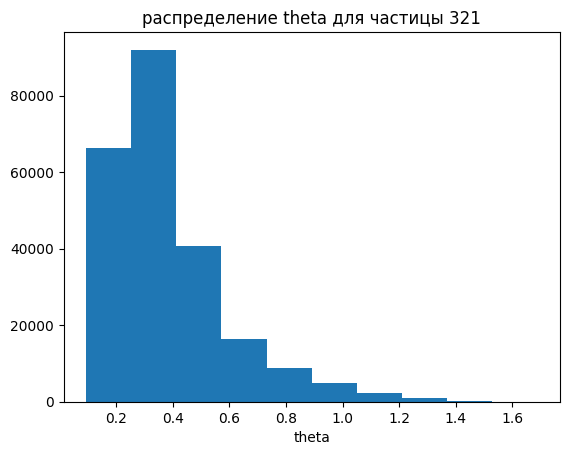

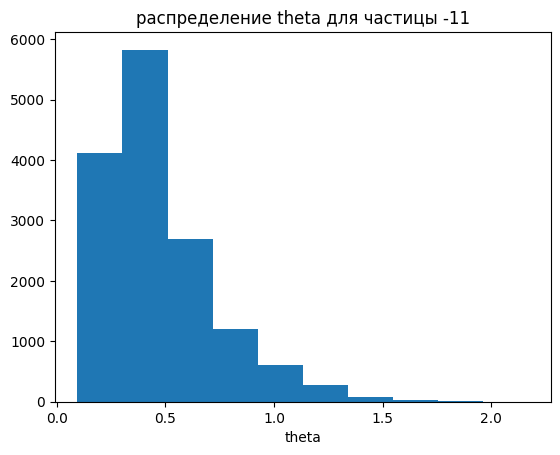

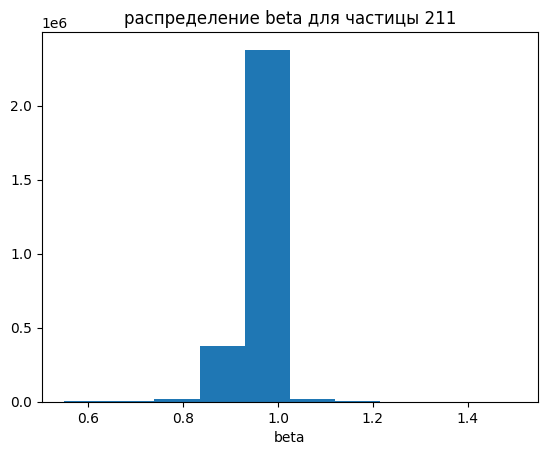

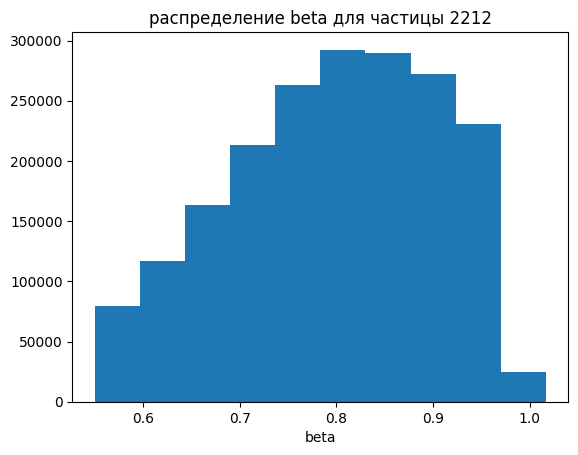

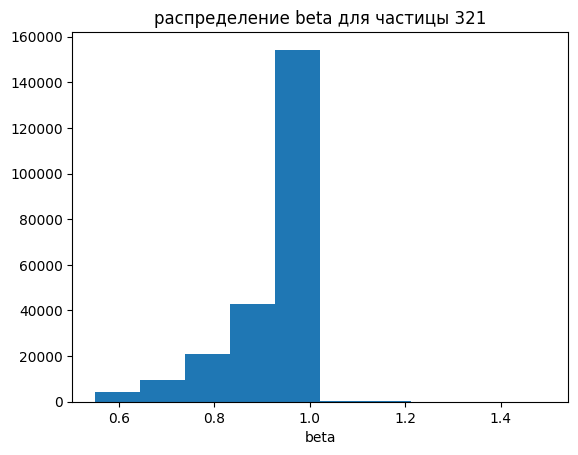

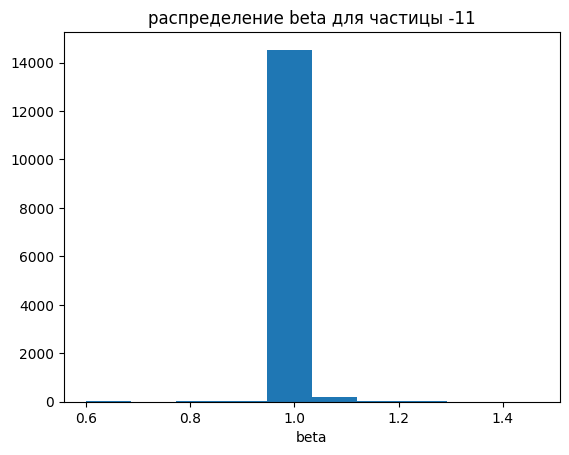

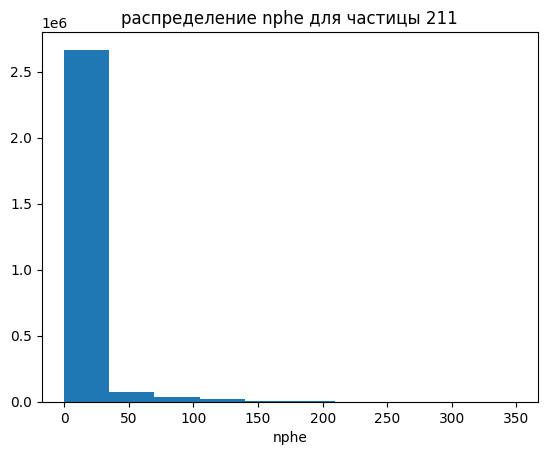

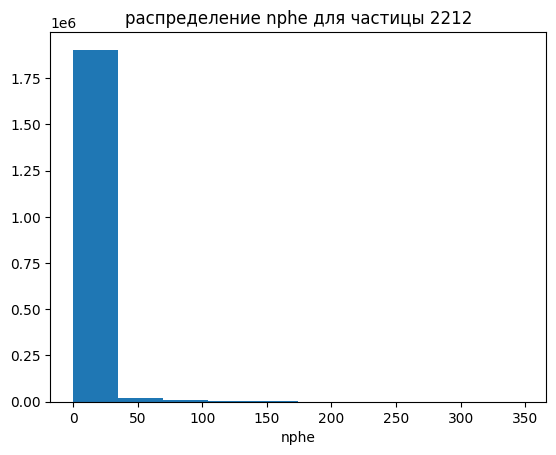

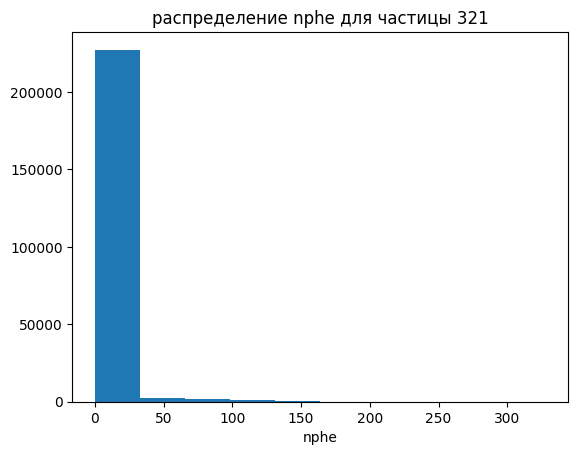

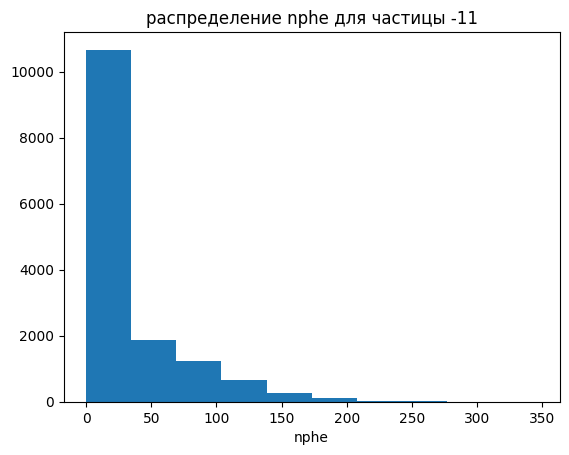

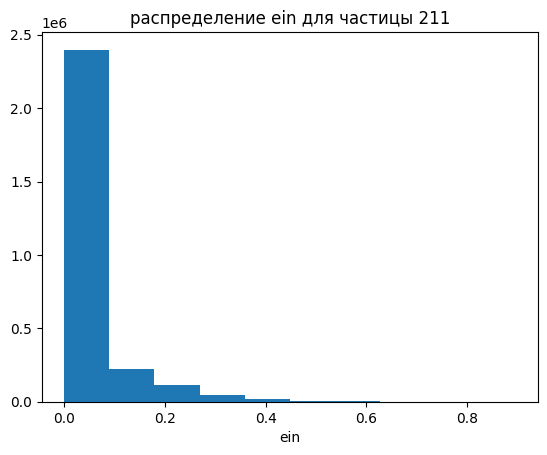

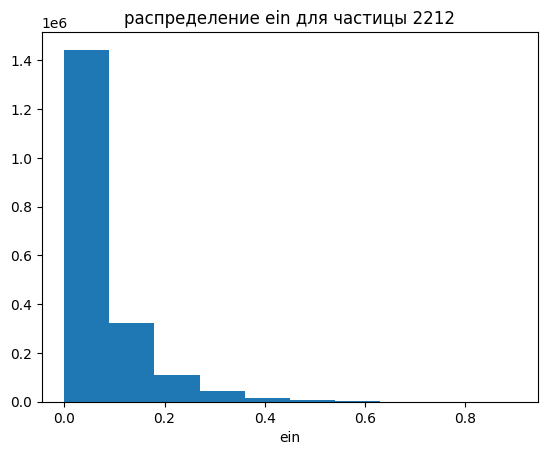

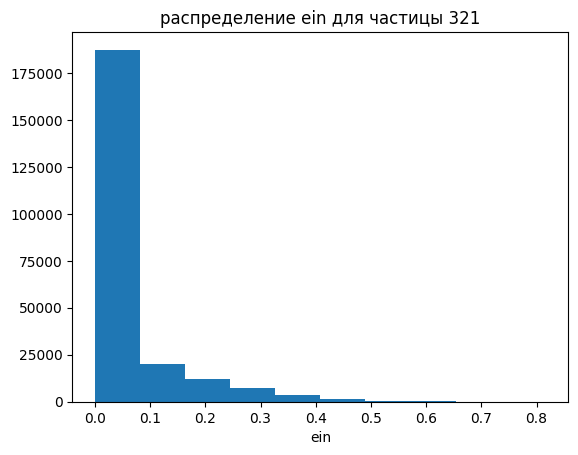

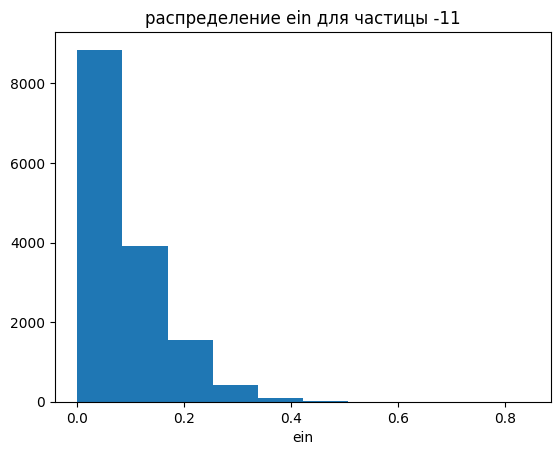

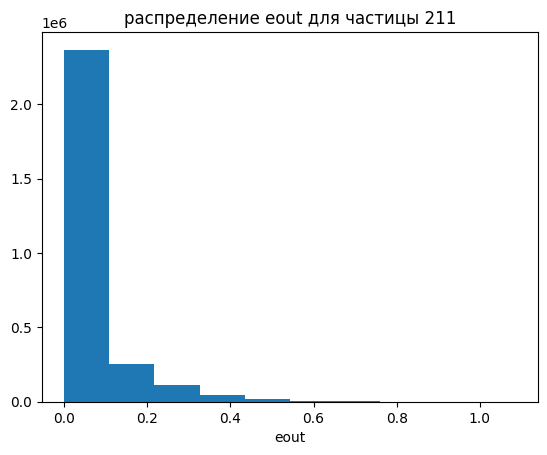

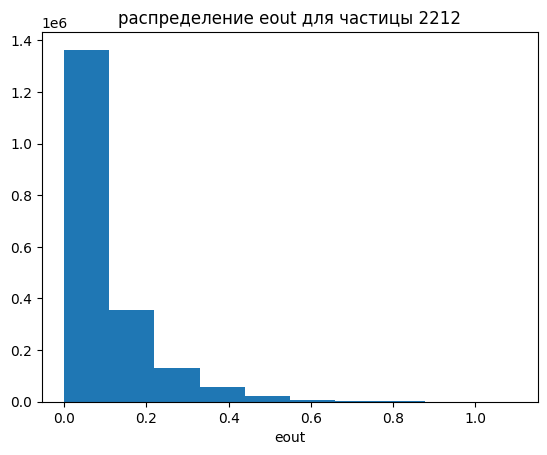

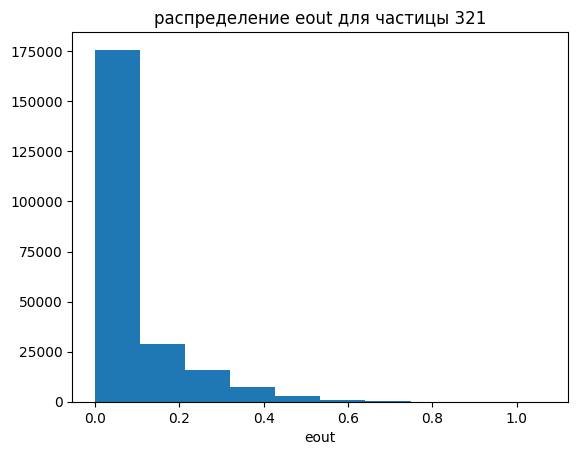

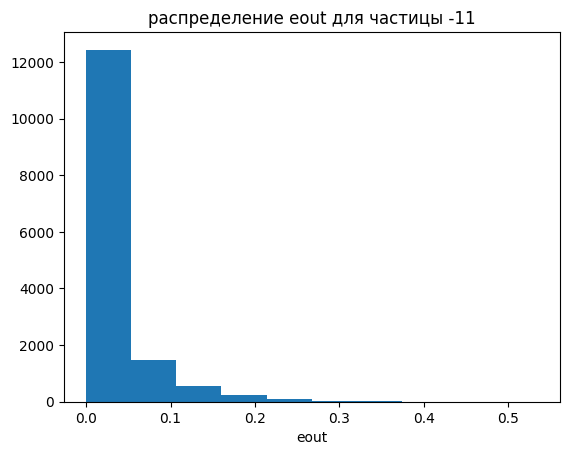

In [30]:
columns = ['p','theta','beta','nphe','ein','eout']

for col in columns:
    for particle in data['id'].unique():
        plt.figure()
        plt.hist(data[data['id'] == particle][col], bins=10)
        plt.xlabel(col)
        plt.title(f"распределение {col} для частицы {particle}")
        plt.show()

Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [31]:
data.groupby(['id']).mean()

,p,theta,beta,nphe,ein,eout
id,,,,,,
-11,0.591886,0.471277,1.001011,26.177948,0.068000,0.021495
211,1.035184,0.574035,0.968695,4.636706,0.042600,0.052250
321,1.744734,0.381561,0.921961,2.001605,0.060969,0.088638
2212,1.454526,0.379136,0.796434,2.059655,0.075566,0.094600


Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


In [32]:
import itertools

particle_ids = data['id'].unique()
features = ['p', 'theta', 'nphe', 'ein', 'eout']
results = []

# Перебираем все возможные пары частиц
for pair in itertools.combinations(particle_ids, 2):
    particle1, particle2 = pair
    
    for feature in features:
        group1 = data[data['id'] == particle1][feature]
        group2 = data[data['id'] == particle2][feature]

        statistic, pvalue = sps.ttest_ind(group1, group2, equal_var=True)

        new_pvalue = pvalue * len(features) * len(list(itertools.combinations(particle_ids, 2)))

        conclusion = "Различия значимы" if new_pvalue < 0.05 else "Различия не значимы"
        results.append({'feature': feature, 'p1': particle1, 'p2': particle2, 'statistic': statistic.round(4), 'pvalue': pvalue.round(4), 'new_pvalue': new_pvalue.round(10), 'conclusion': conclusion})
        
results = pd.DataFrame(results)

In [33]:
for index, row in results.iterrows():
    feature, particle1, particle2 = row['feature'], row['p1'], row['p2']
    group1 = data[data['id'] == particle1][feature]
    group2 = data[data['id'] == particle2][feature]

    confidence_interval = sps.t.interval(confidence=0.95, df=len(group1)+len(group2)-2, loc=group1.mean()-group2.mean(), scale=np.sqrt(group1.var()/len(group1) + group2.var()/len(group2)))
    results.at[index, 'lower'] = confidence_interval[0]
    results.at[index, 'upper'] = confidence_interval[1]
    
    conclusion_interval = "Согласуется" if (confidence_interval[0] < 0 < confidence_interval[1]) else "Не согласуется"
    results.at[index, 'conclusion from int'] = conclusion_interval

results

,feature,p1,p2,statistic,pvalue,new_pvalue,conclusion,lower,upper,conclusion from int
0,p,211,2212,-643.8521,0.0000,0.000000e+00,Различия значимы,-0.420592,-0.418091,Не согласуется
1,theta,211,2212,743.2696,0.0000,0.000000e+00,Различия значимы,0.194440,0.195358,Не согласуется
2,nphe,211,2212,155.6310,0.0000,0.000000e+00,Различия значимы,2.546503,2.607600,Не согласуется
3,ein,211,2212,-460.3617,0.0000,0.000000e+00,Различия значимы,-0.033107,-0.032824,Не согласуется
4,eout,211,2212,-455.3425,0.0000,0.000000e+00,Различия значимы,-0.042539,-0.042161,Не согласуется
5,p,211,321,-446.2464,0.0000,0.000000e+00,Различия значимы,-0.713004,-0.706095,Не согласуется
6,theta,211,321,269.1376,0.0000,0.000000e+00,Различия значимы,0.191549,0.193400,Не согласуется
7,nphe,211,321,62.6355,0.0000,0.000000e+00,Различия значимы,2.575380,2.694823,Не согласуется
8,ein,211,321,-112.1739,0.0000,0.000000e+00,Различия значимы,-0.018726,-0.018011,Не согласуется
9,eout,211,321,-182.4584,0.0000,0.000000e+00,Различия значимы,-0.036833,-0.035943,Не согласуется


Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:** 
У нас подтвердилась только одна гипотеза

Если скорректированное p-значение < 0.05: Отвергаем нулевую гипотезу и говорим, что существует статистически значимая разница между средними значениями 'p' для типов частиц А и Б.
Если скорректированное p-значение >= 0.05: Не отвергаем нулевую гипотезу. Нет оснований говорить о наличии значимой разницы между средними.


Если интервал содержит 0: Это согласуется с не отвергнутой нулевой гипотезой. Нет значимой разницы между средними.
Если интервал не содержит 0: Это указывает на наличие статистически значимой разницы между средними значениями 'p'.

Частицы проще всего различить, если у них ниже скорректированный pvalue. Например, частицы 2212 и 321 по признаку nphe различить сложнее, чем все остальные

Студенты профиля **химия** могут решать любую из задач.



### Задача 6

Это задание является продолжением задачи 5 из прошлого домашнего задания. Здесь вам необходимо наглядно сравнить два критерия из предыдущей задачи. Для этого прооделайте все пункты для обоих критериев. Обязательно подписывайте какой график к какому критерию относится.


**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

/home/egor/repoes/data_scince_4_sem/venv/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


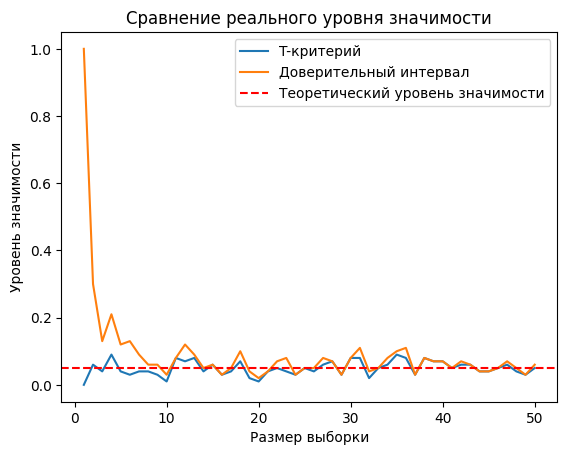

In [34]:

n_sample = 100
n_range = range(1, 51)
alpha = 0.05


real_alpha_t = []
real_alpha_ci = []

for n in n_range:
    rej_t = 0
    in_ci = 0
    for i in range(n_sample):
        data1 = sps.norm.rvs(size=n)
        data2 = sps.norm.rvs(size=n)

        i, p_value = sps.ttest_ind(data1, data2)
        if p_value < alpha:
            rej_t += 1

        diff = data1.mean() - data2.mean()
        std_err = np.sqrt(data1.var() / n + data2.var() / n)
        error = sps.norm.ppf(1 - alpha / 2) * std_err
        lower, upper = diff - error, diff + error
        if lower * upper > 0:
            in_ci += 1

    real_alpha_t.append(rej_t / n_sample)
    real_alpha_ci.append(in_ci / n_sample)


plt.plot(n_range, real_alpha_t, label="T-критерий")
plt.plot(n_range, real_alpha_ci, label="Доверительный интервал")
plt.axhline(y=alpha, color='red', linestyle='--', label="Теоретический уровень значимости")
plt.xlabel("Размер выборки")
plt.ylabel("Уровень значимости")
plt.legend()
plt.title("Сравнение реального уровня значимости")
plt.show()

**Вывод:** при малых размерах выборки мы наблюдаем сильные колебания реального уровня значимости.

**2.** Для значений $n \in \{5, 15, 30, 50, 100\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.25 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

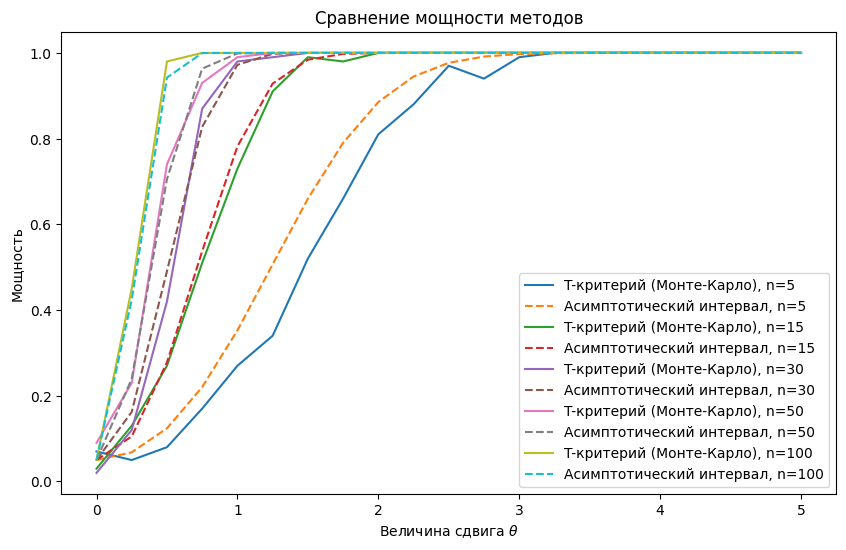

In [35]:
n_simulations = 100
n_values = [5, 15, 30, 50, 100] 
theta_values = np.arange(0, 5.25, 0.25)
alpha = 0.05

def power_ttest_mc(n, theta):
    rejections = 0
    for i in range(n_simulations):
        data1 = sps.norm.rvs(size=n)
        data2 = sps.norm.rvs(loc=theta, size=n)
        i, p_value = sps.ttest_ind(data1, data2)
        if p_value < alpha:
            rejections += 1
    return rejections / n_simulations


def power_asymp_interval(n, theta):
    effect_size = theta / np.sqrt(2 / n)
    critical_value = sps.norm.ppf(1 - alpha/2)
    return 1 - sps.norm.cdf(critical_value - effect_size) + sps.norm.cdf(-critical_value - effect_size)


power_ttest_mc_values = {}
power_asymp_interval_values = {}
for n in n_values:
    power_ttest_mc_values[n] = [power_ttest_mc(n, theta) for theta in theta_values]
    power_asymp_interval_values[n] = [power_asymp_interval(n, theta) for theta in theta_values]

plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(theta_values, power_ttest_mc_values[n], label=f"T-критерий (Mонте-Карло), n={n}")
    plt.plot(theta_values, power_asymp_interval_values[n], label=f"Асимптотический интервал, n={n}", linestyle='--')
plt.xlabel(r"Величина сдвига $\theta$")
plt.ylabel("Мощность")
plt.legend()
plt.title("Сравнение мощности методов")
plt.show()

**Вывод:** Исходя из графика, видно, что мощность t-критерия и асимптотического интервала увеличивается с ростом размера выборки n и величины сдвига $\theta$. При малых размерах выборки нужен больший сдвиг для достижения высокой мощности. Оценка мощности методом Монте-Карло и асимптотической формулой сходится с увеличением размера выборки.

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta \in (0, 5)$ по сетке с шагом 0.25.

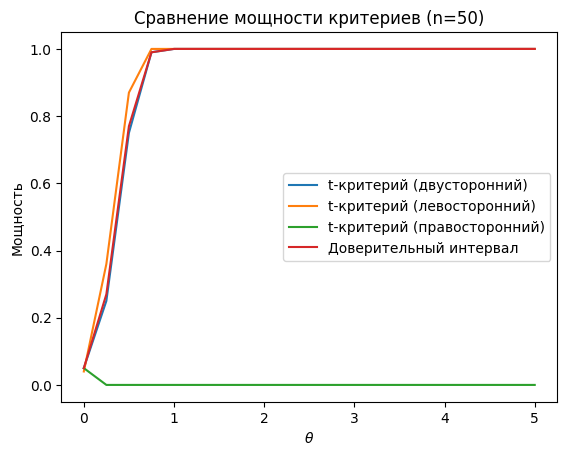

In [36]:
np.random.seed(207)

n = 50
theta_values = np.arange(0, 5.25, 0.25)
alpha = 0.05
n_simulations = 100

def power_two_sided(data1, data2):
    s, p_value = sps.ttest_ind(data1, data2)
    return p_value < alpha

def power_left_sided(data1, data2):
    s, p_value = sps.ttest_ind(data1, data2, alternative='less')
    return p_value < alpha

def power_right_sided(data1, data2):
    s, p_value = sps.ttest_ind(data1, data2, alternative='greater')
    return p_value < alpha

def power_ci(data1, data2):
    diff = data1.mean() - data2.mean()
    std_err = np.sqrt(data1.var() / n + data2.var() / n)
    margin_of_error = sps.norm.ppf(1 - alpha / 2) * std_err
    lower, upper = diff - margin_of_error, diff + margin_of_error
    return lower * upper > 0


power_ttest_two = []
power_ttest_left = []
power_ttest_right = []
power_ci_ = []

for theta in theta_values:
    rej_ttest_two = 0
    rej_ttest_left = 0
    rej_ttest_right = 0
    rej_ci = 0
    for i in range(n_simulations):
        data1 = sps.norm.rvs(size=n)
        data2 = sps.norm.rvs(loc=theta, size=n)

        if power_two_sided(data1, data2):
            rej_ttest_two += 1
        if power_left_sided(data1, data2):
            rej_ttest_left += 1
        if power_right_sided(data1, data2):
            rej_ttest_right += 1
        if power_ci(data1, data2):
            rej_ci += 1

    power_ttest_two.append(rej_ttest_two / n_simulations)
    power_ttest_left.append(rej_ttest_left / n_simulations)
    power_ttest_right.append(rej_ttest_right / n_simulations)
    power_ci_.append(rej_ci / n_simulations)


plt.plot(theta_values, power_ttest_two, label="t-критерий (двусторонний)")
plt.plot(theta_values, power_ttest_left, label="t-критерий (левосторонний)")
plt.plot(theta_values, power_ttest_right, label="t-критерий (правосторонний)")
plt.plot(theta_values, power_ci_, label="Доверительный интервал")
plt.xlabel(r"$\theta$")
plt.ylabel("Мощность")
plt.legend()
plt.title("Сравнение мощности критериев (n=50)")
plt.show()

**Вывод:** t-критерий с двусторонней и правосторонней альтернативой и доверительный интервал увеличивают свою мощность при повышении $\theta$ и на всем промежутке имеют практически одинаковое значение. Правосторонний критерий оказался слаб для данного распределения и соответствующих параметров

Сделайте общий вывод по сравнению двух критериев.

**Вывод:**

Основываясь на полученных данных, оба критерия ведут себя одинаково. Даже на маленьких размерах выборок у них практически совпадает мощность и реальный уровень значимости.